In [2]:
#mapper.py
#file name: googlebooks-eng-us-all-1gram-20120701-w

import pandas as pd
from functools import reduce



data=pd.read_csv('googlebooks-eng-us-all-1gram-20120701-w', sep="\t", header=None)
data.head()


,0,1,2,3
0,W'ald_NOUN,1892,1,1
1,W'ald_NOUN,1899,1,1
2,W'ald_NOUN,1905,1,1
3,W'ald_NOUN,1910,1,1
4,W'ald_NOUN,1914,2,1


# Step 1: map and reduce

### mapper.py (mine)

In [35]:
import sys
def CleanWord(aword):
    """
    Function input: A string which is meant to be
       interpreted as a single word.
    Output: a clean, lower-case version of the word
    """
    # Make Lower Case
    aword = aword.lower()
    # Remvoe special characters from word
    for character in '.,;:\'?':
        aword = aword.replace(character,'')
    # No empty words
    if len(aword)==0:
        return None
    # Restrict word to the standard english alphabet
    for character in aword:
        if character not in 'abcdefghijklmnopqrstuvwxyz':
            return None
    # return the word
    return aword
 
# Now we loop over lines in the system input
for line in sys.stdin:
    # Strip the line of whitespace and split into a list
    line = line.strip().split()
    # Use CleanWord function to clean up the word
    word = CleanWord(line[0])
 
    # If CleanWord didn't return a string, move on
    if word == None:
        continue
 
    # Get the year and the number of occurrences from
    # the ngram line
    year = int(line[1])
    occurrences = int(line[2])
 
    # Print the output: year and number of occurrences
    if "google" in word:
        print('%s\t%s' % (year,occurrences))



### my_mapper.py (provided)

In [ ]:
import sys

keyword = "google"
number_word = {}
for line in sys.stdin:
    words = line.split("\t")
    
    if keyword.lower() in words[0].lower():
        print("{}\t{}\t{}".format(words[0],words[1],words[2]))


### reduce.py (mine)

In [ ]:
import sys
import os
import collections
import functools
import operator

x=[]
dic={}

# add the values with same year
for line in sys.stdin:
    line = line.strip().split('\t')
    dic[line[0]] = int(line[1])
    x.append(dic)

result = dict(functools.reduce(operator.add,map(collections.Counter, x)))

print(str(result))

### my_reducer.py (provided)

In [ ]:
import sys

words_data = {}

for line in sys.stdin:
    word, year, count = line.split("\t")
    
    try:
        words_data[year.strip()] += int(count.strip())
    except KeyError:
        words_data[year.strip()] = int(count.strip())

for year, count in words_data.items():
    print("{}\t{}".format(year,count))

# Step 3: moar data and testing

**Test mapper.py:** `cat googlebooks-eng-us-all-1gram-20120701-g | ./mapper.py >> test_output`

**Example output (test_output):** 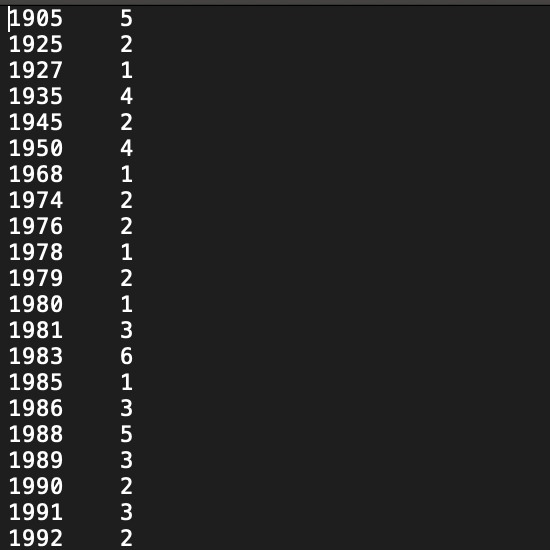

**Test reducer.py:**`cat test_output | ./reduce.py | sort -k1,1`

**Example output:** 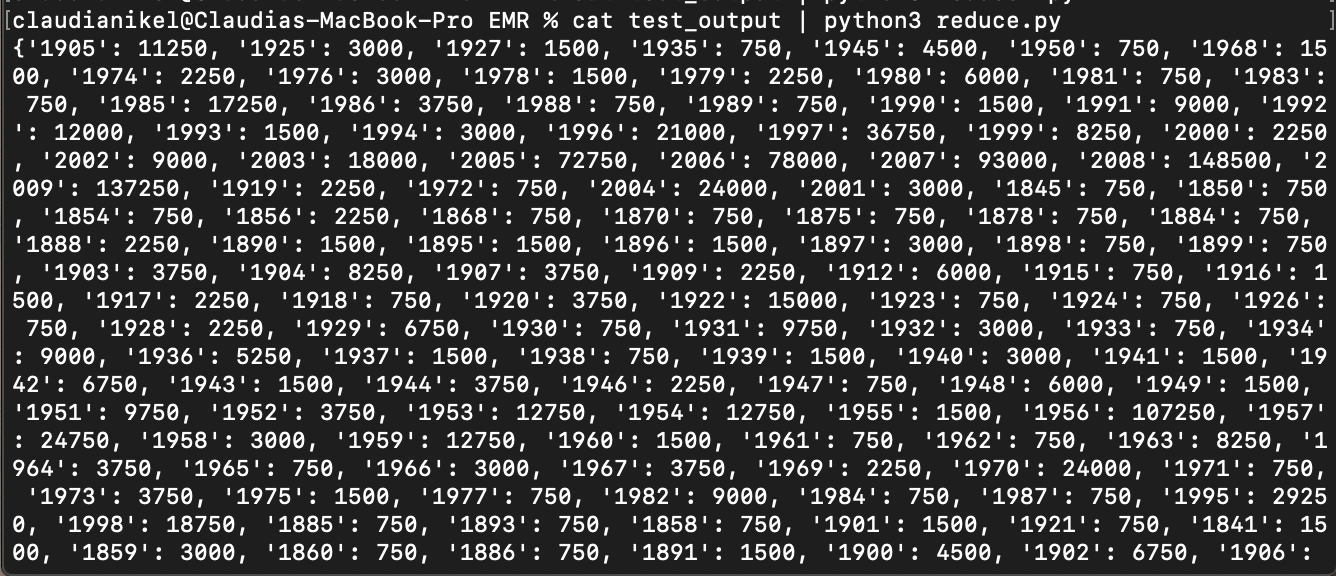

# Step 4: S3 parafernalia

**1. Create a bucket:** 
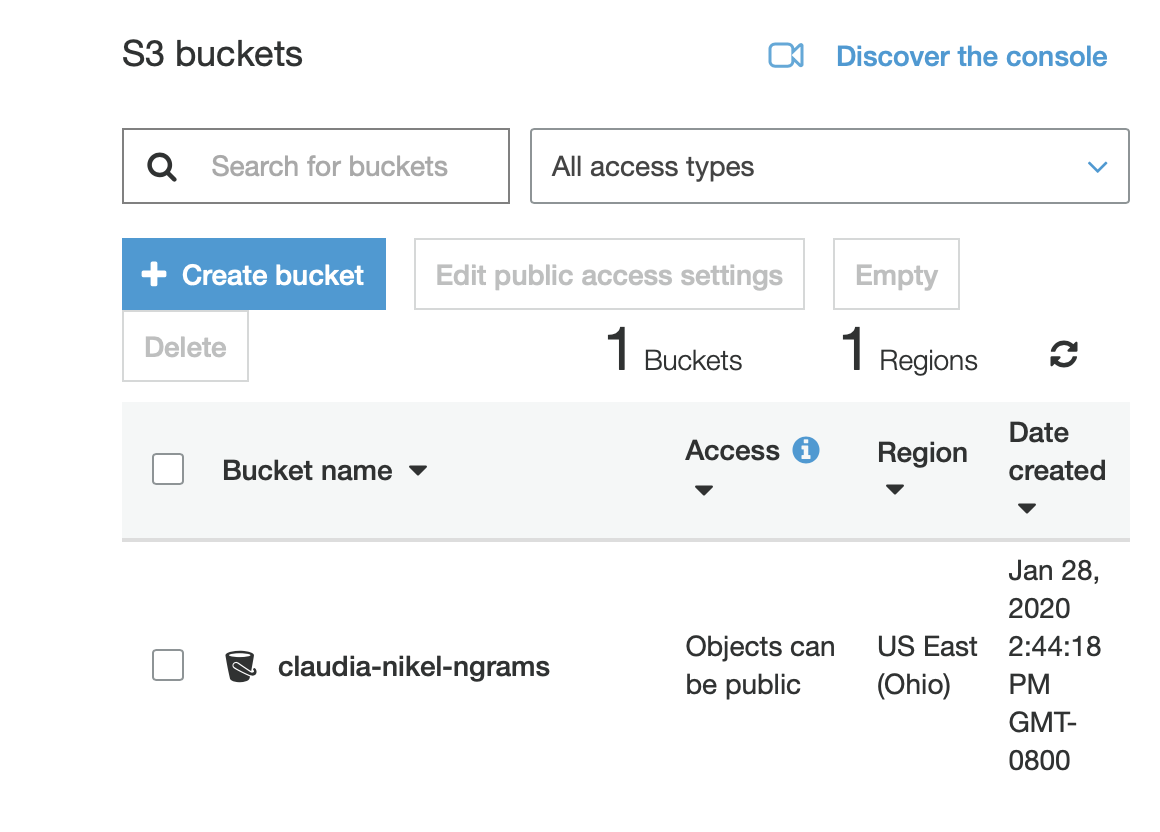


**2. <br/>
a) Create a directory 'scripts' in S3 bucket <br/>
b) Create a directory called 'logs' in S3 bucket** 

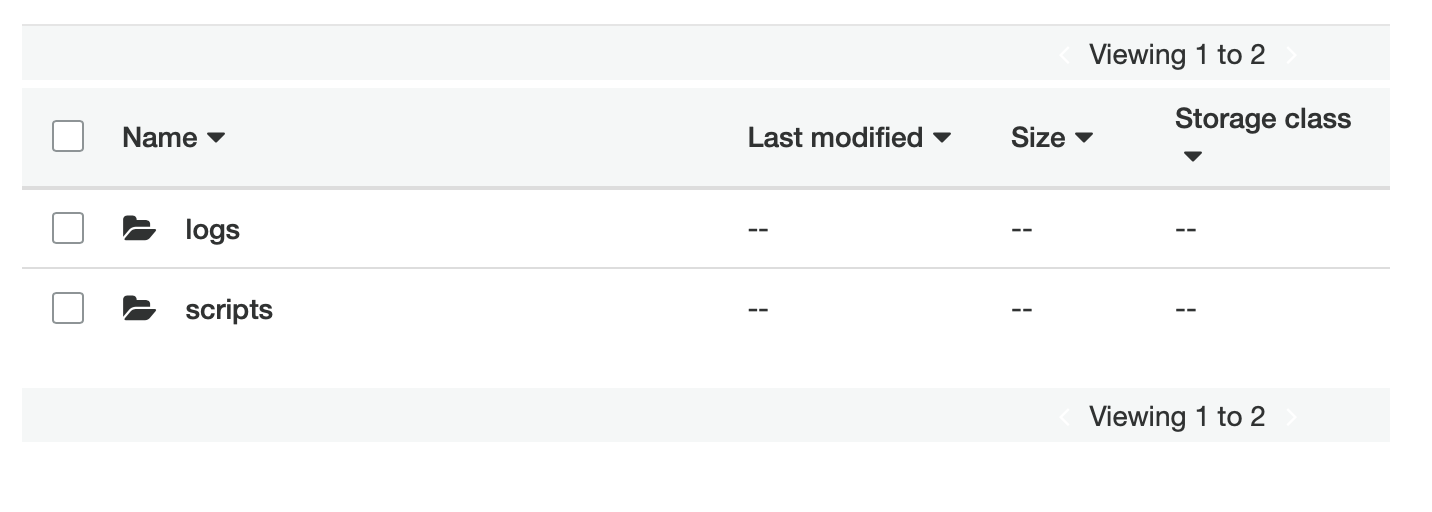

**c) Upload mapper.py and reduce.py to bucket <br/>**
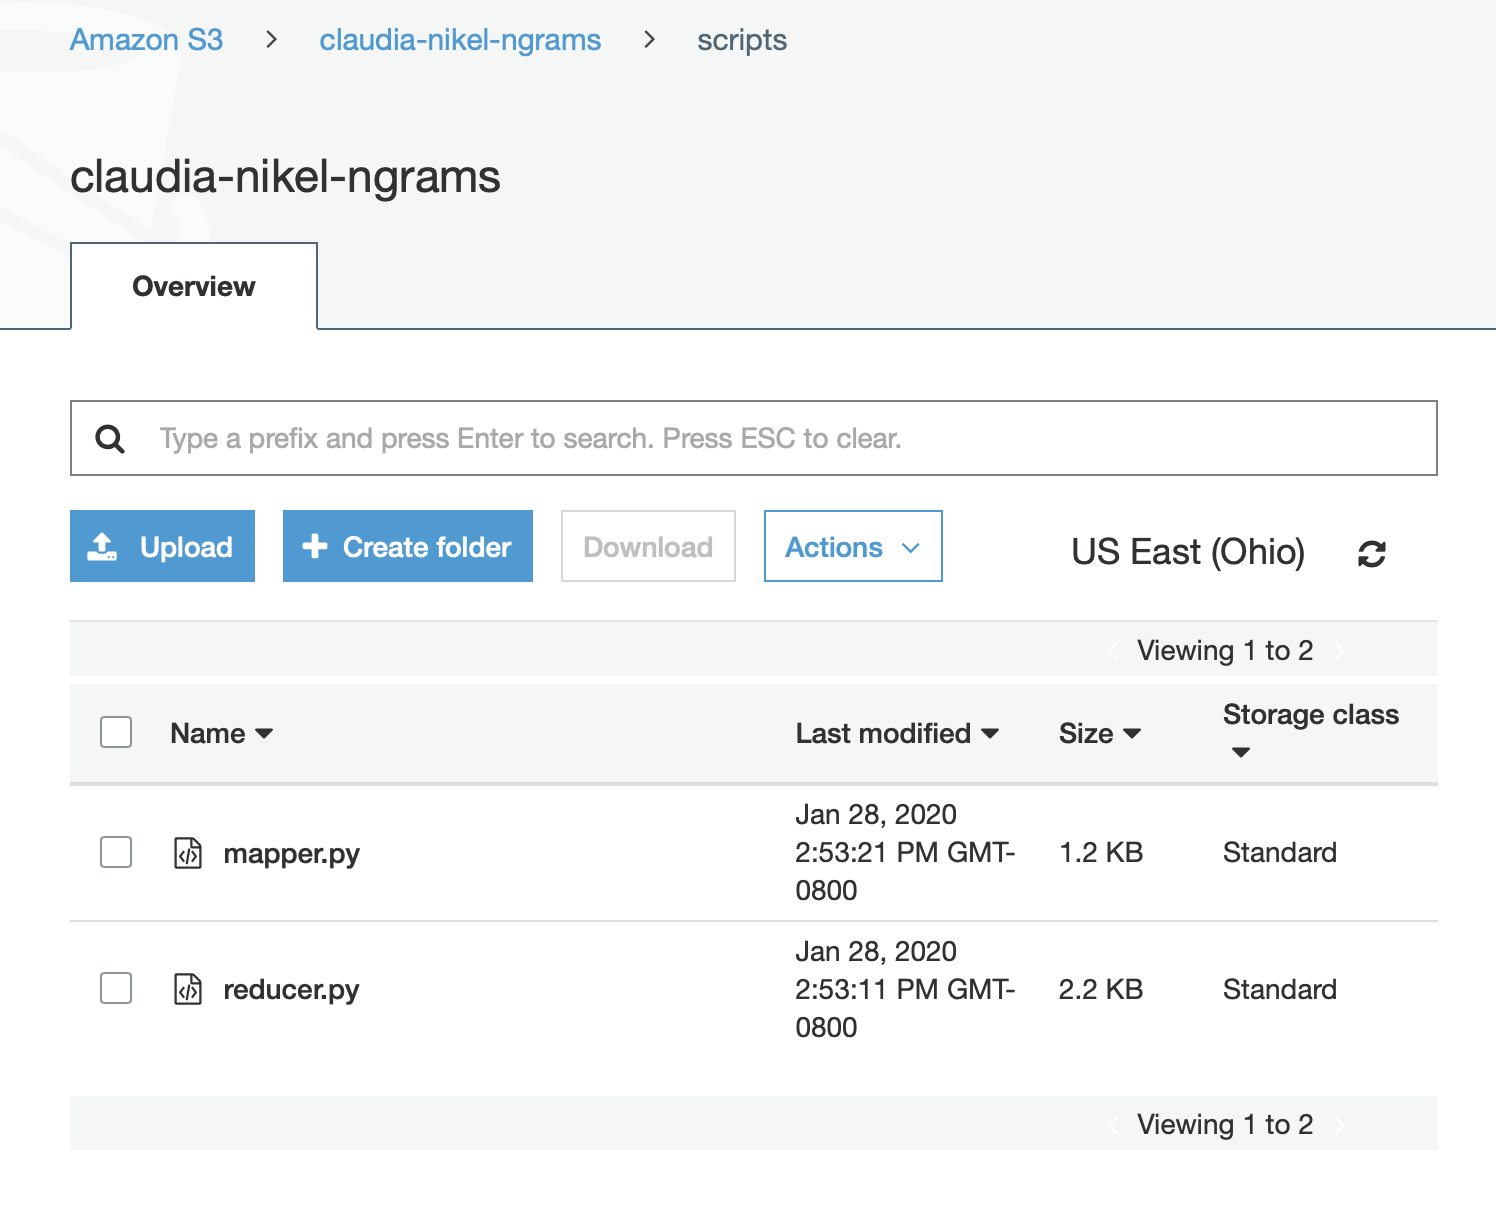

**d) Create a director called 'unigrams' in S3 bucket and upload all American English unigrams files <br/>**
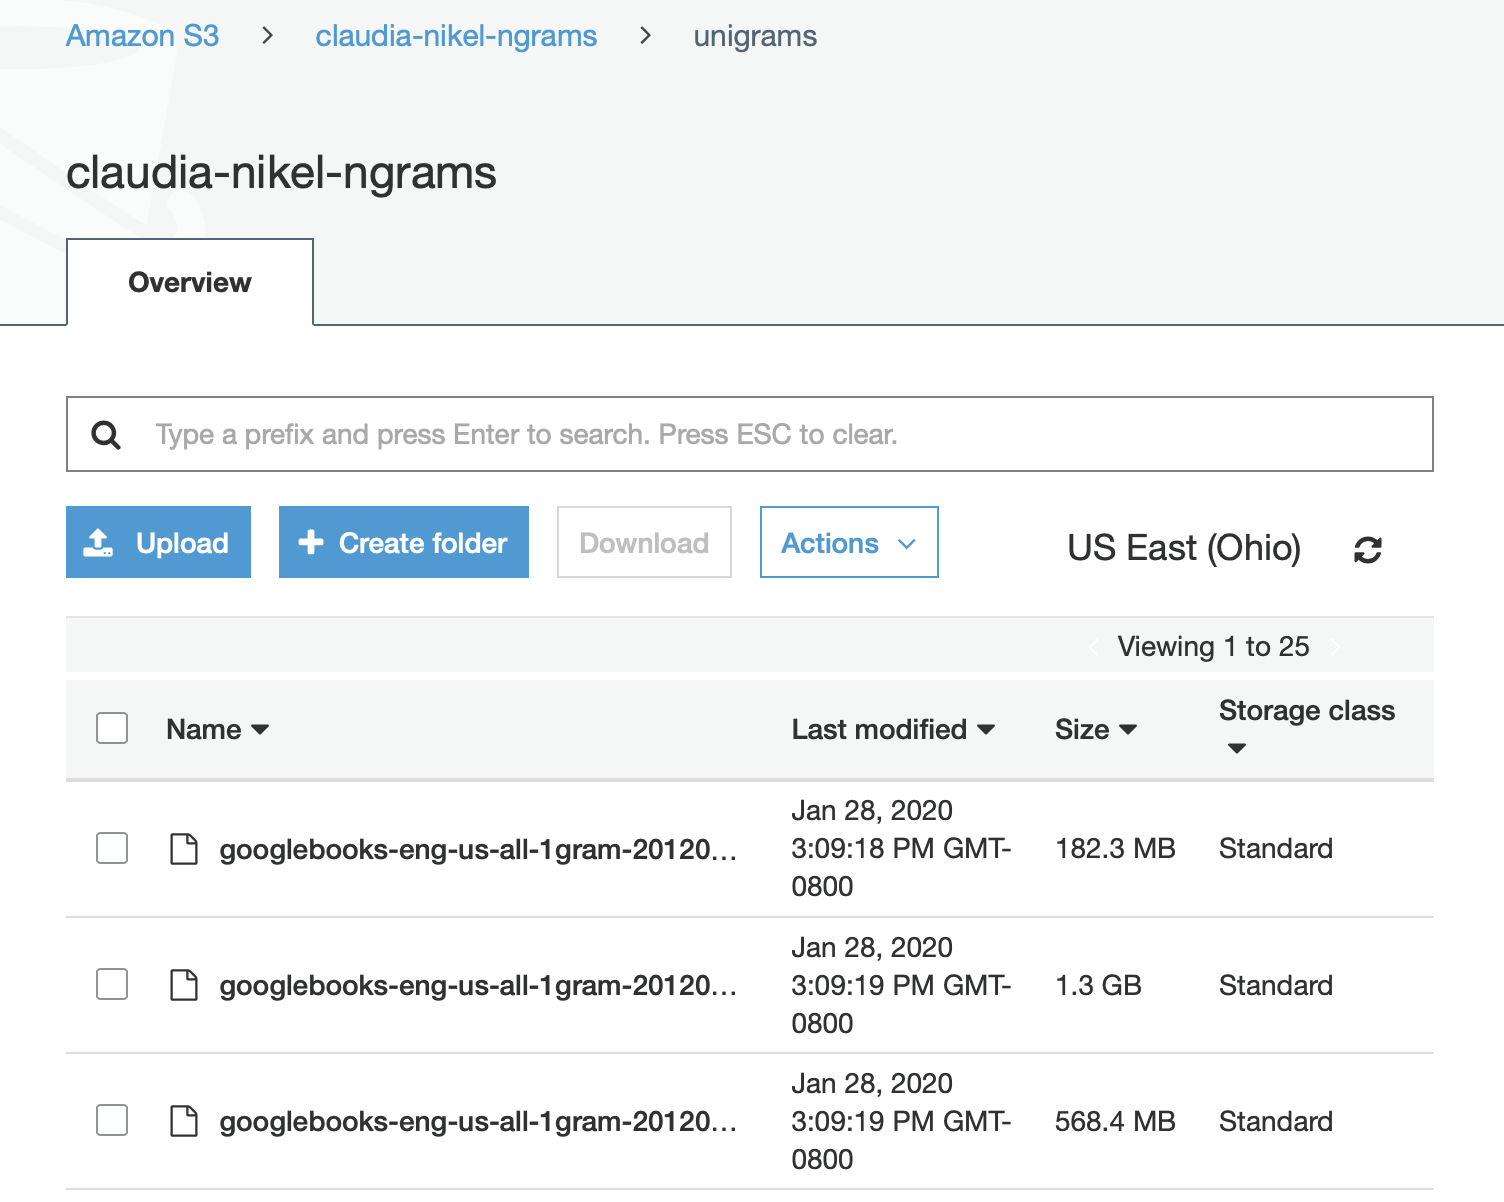


# Step 6: Take off

**Create a cluster:** 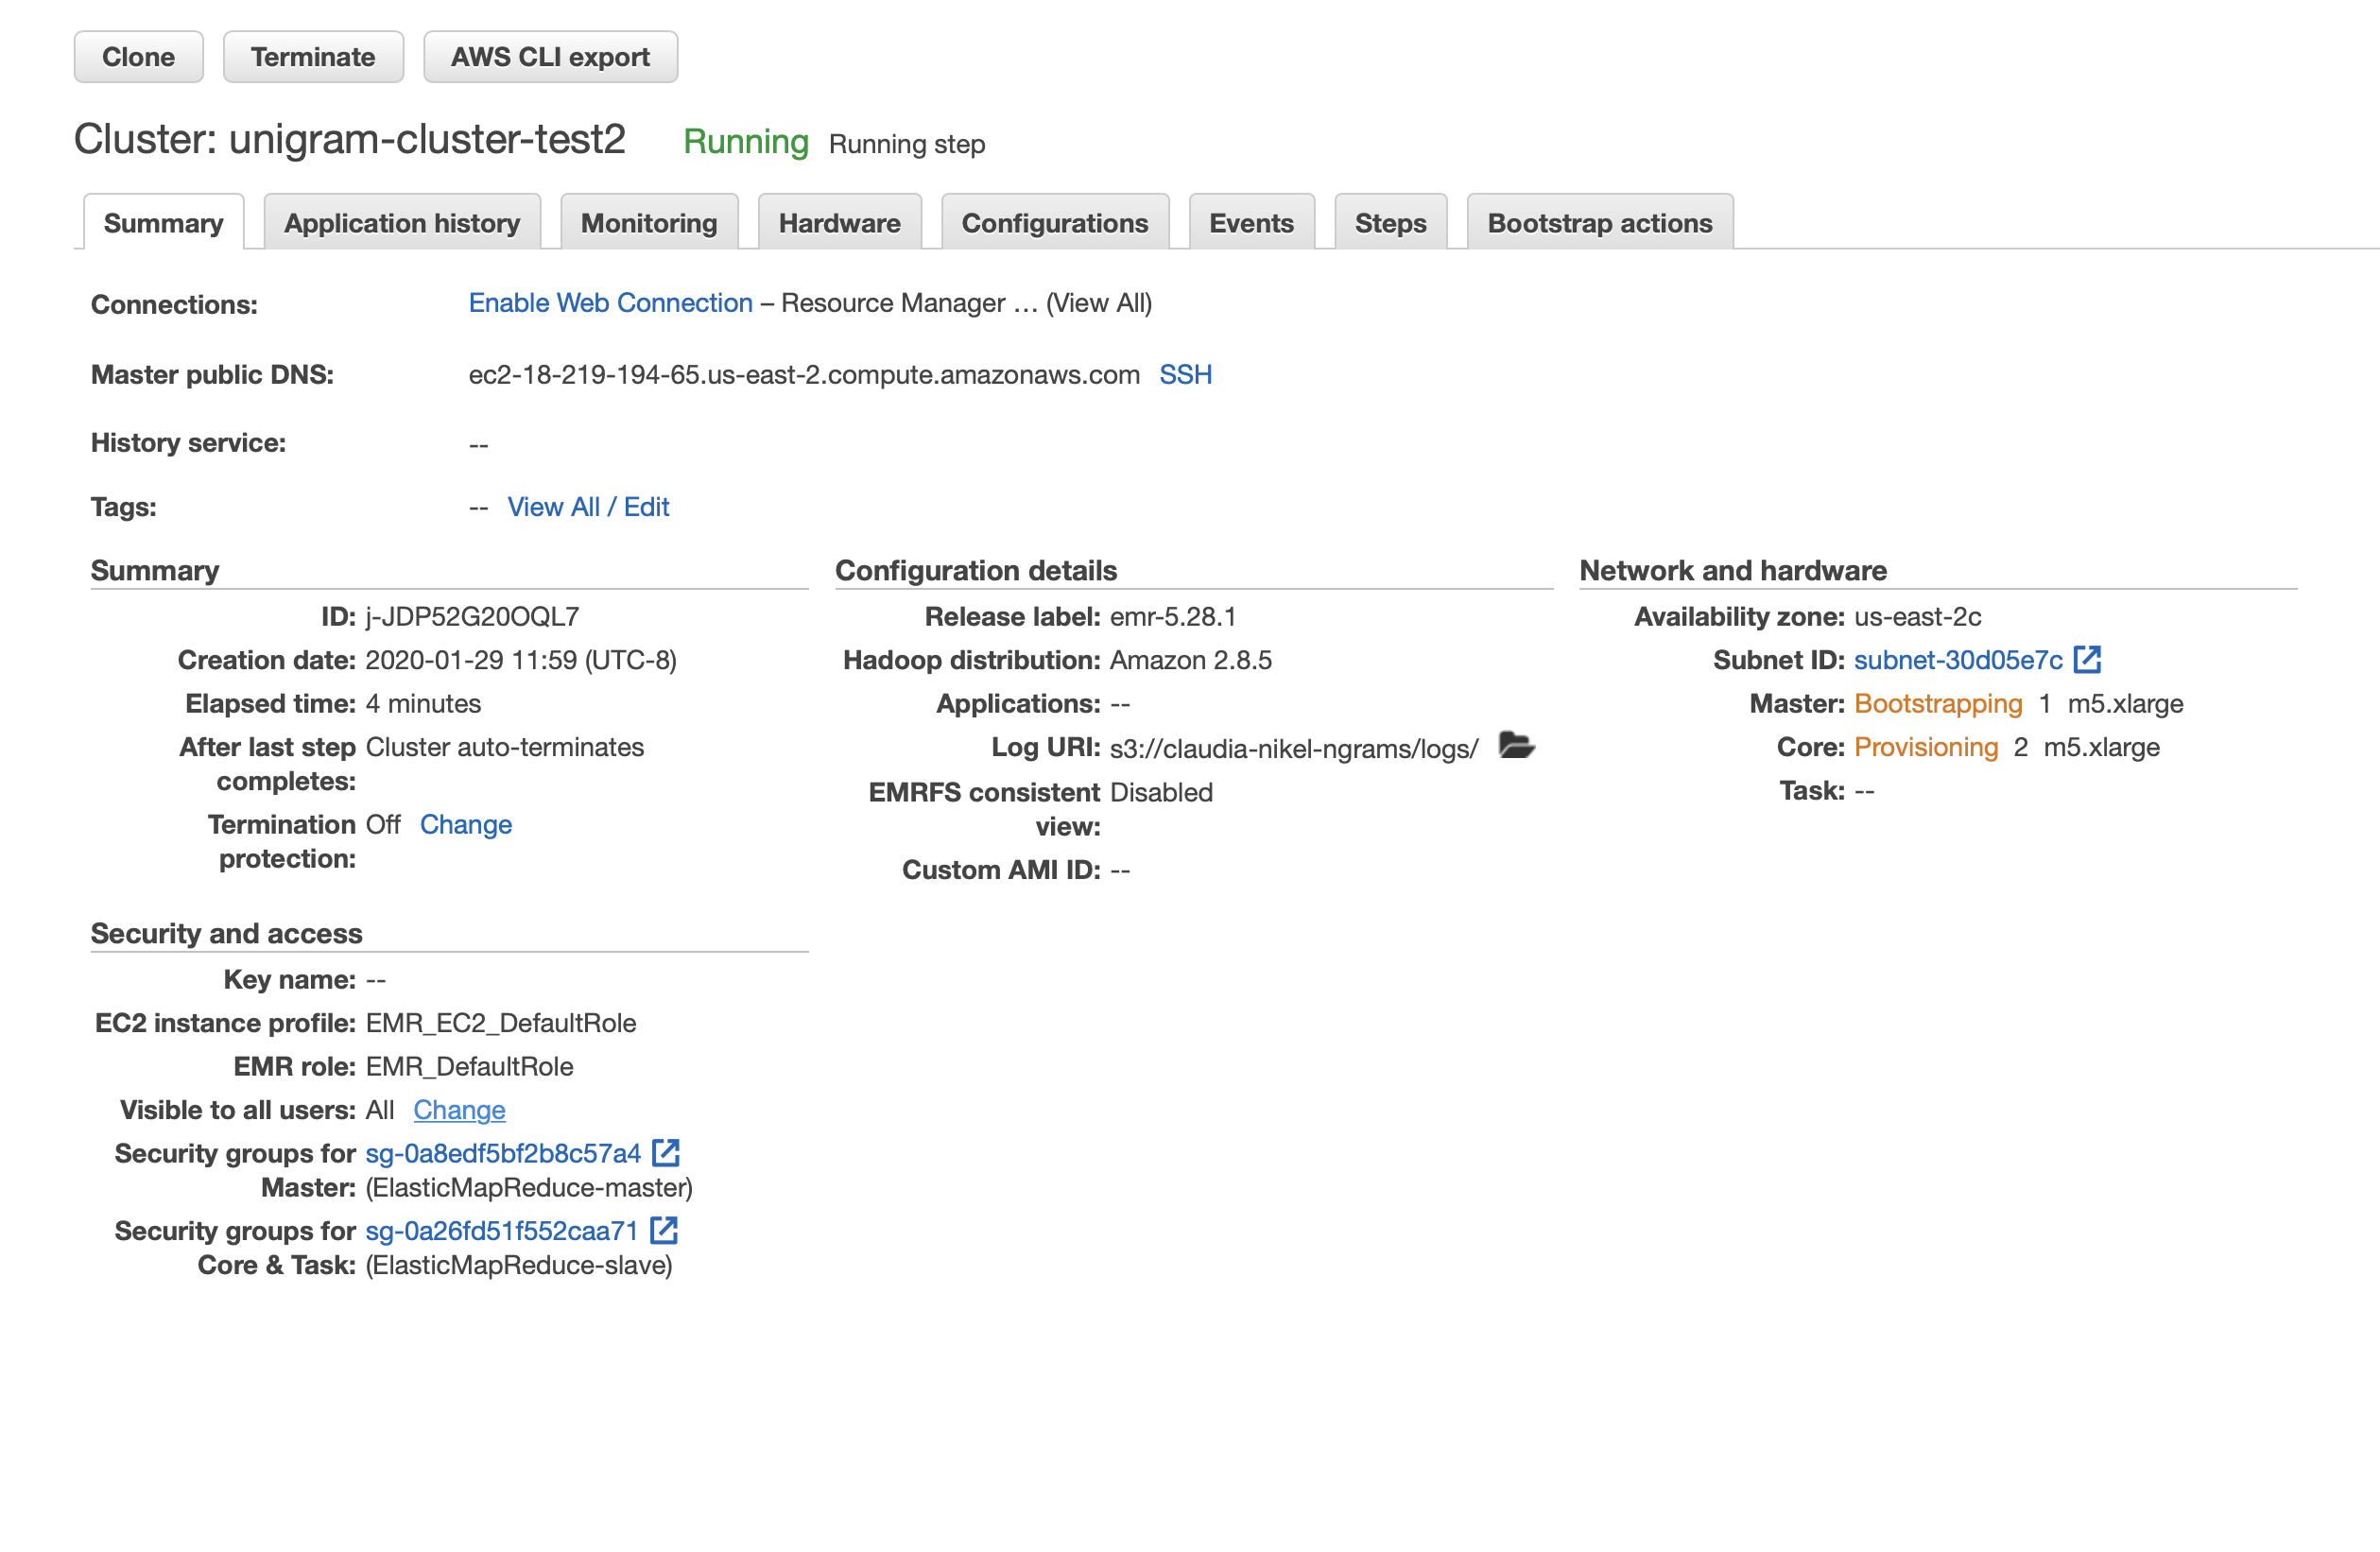

**Finished cluster:** 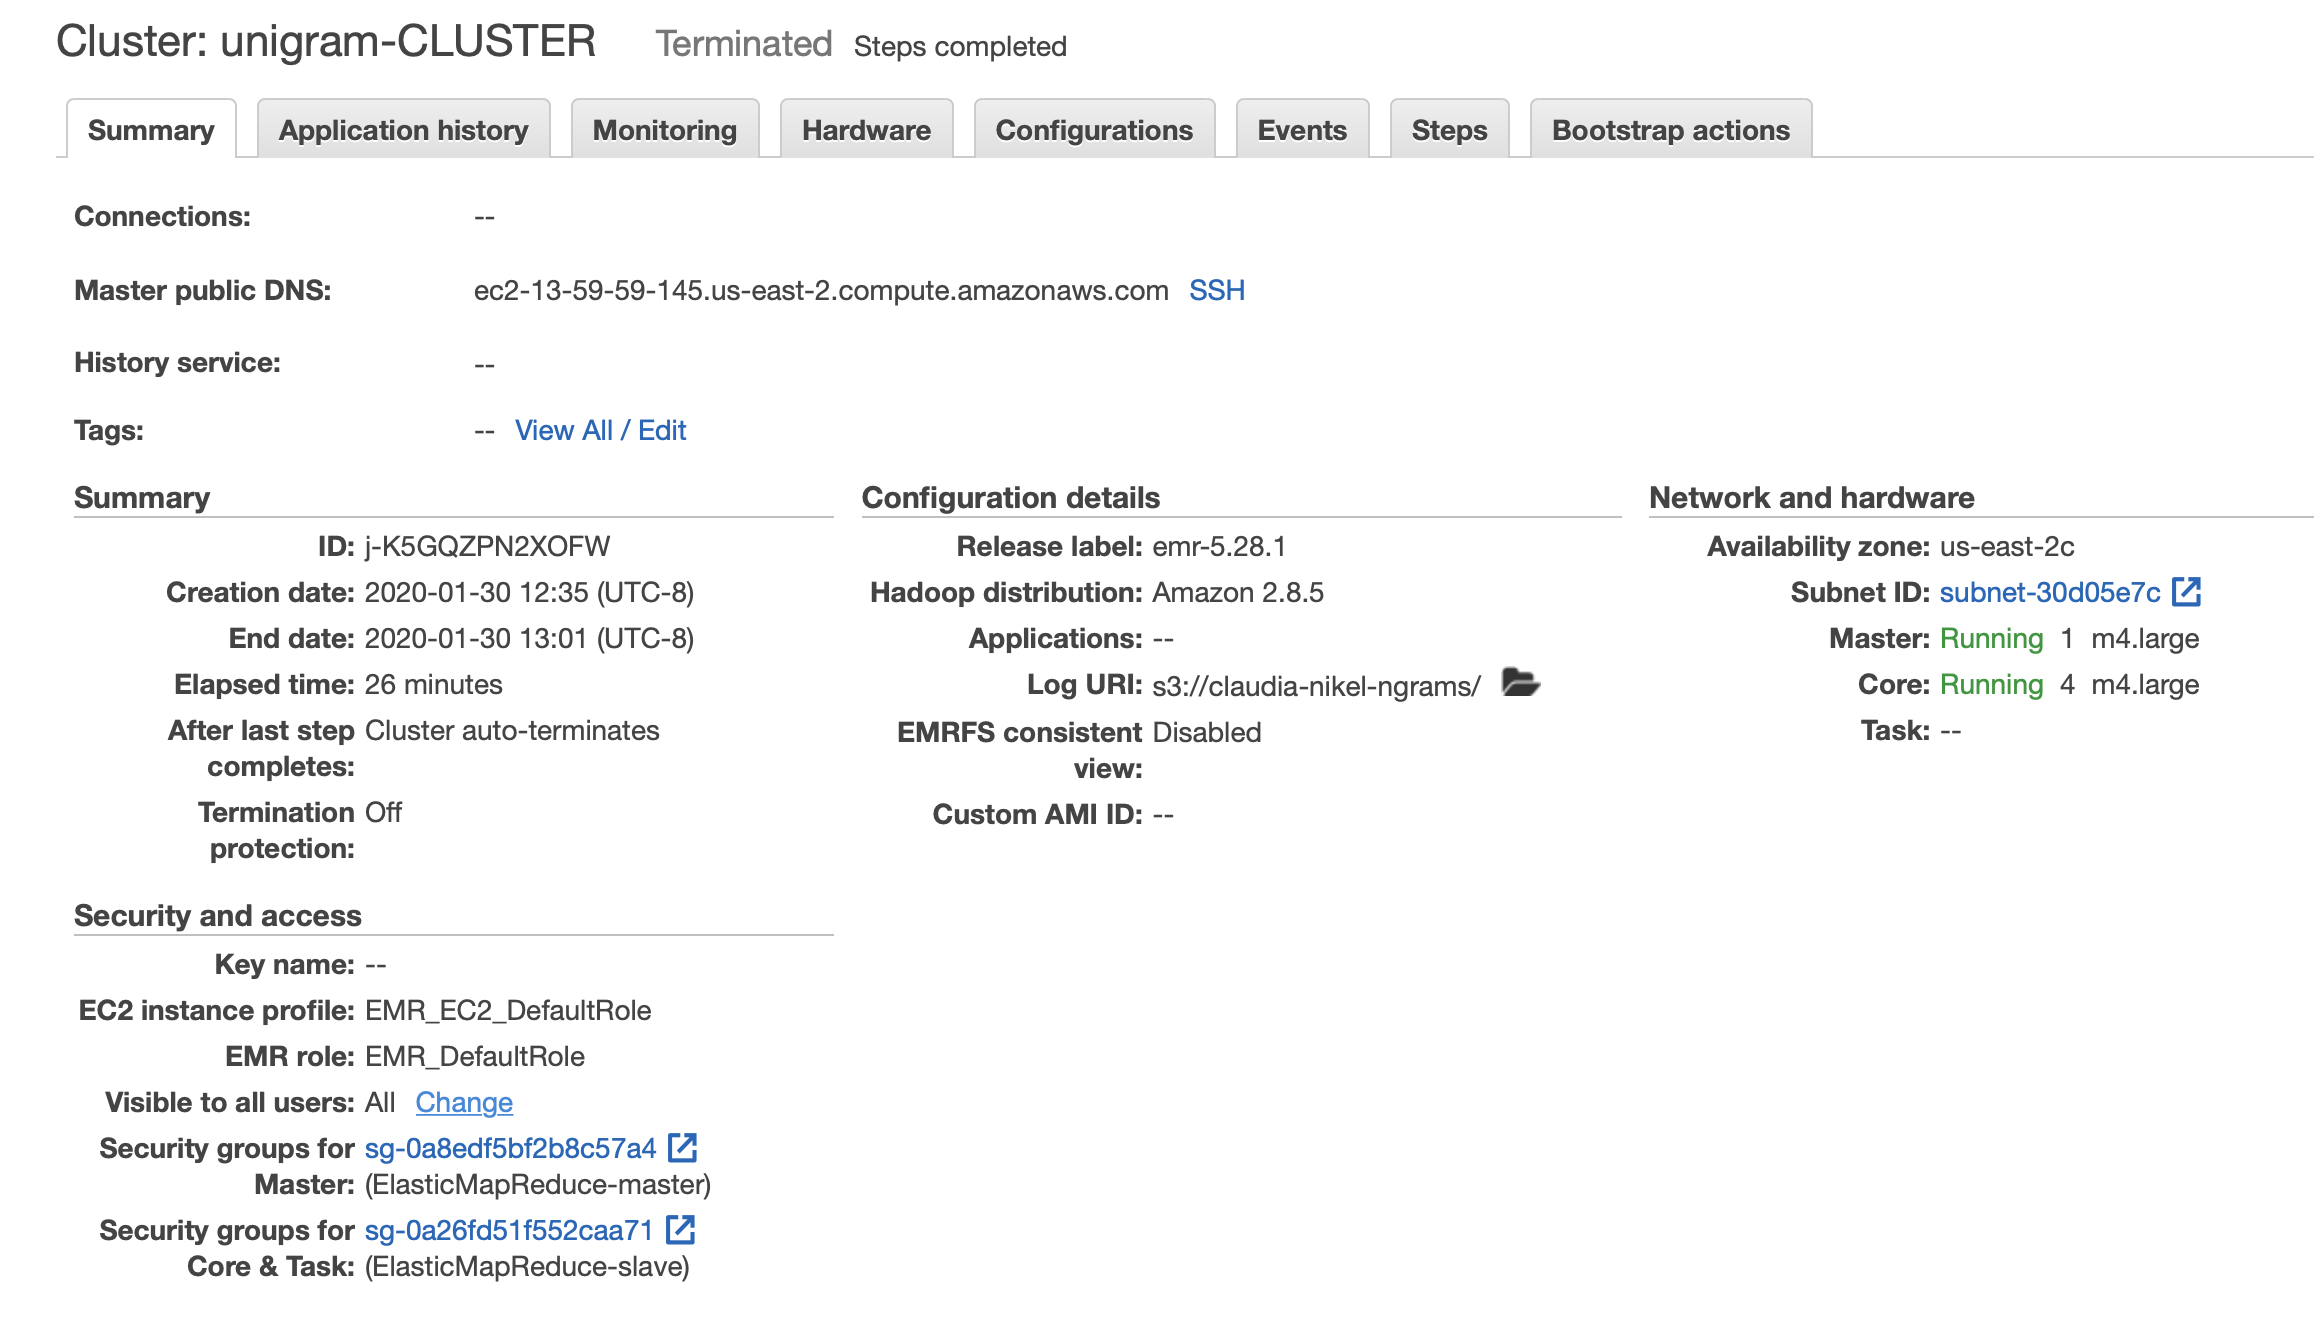

# Step 7: land

### Download the outputs from your S3 bucket and combine files:

In [42]:
import pandas as pd

data0=pd.read_csv('part-00000', sep="\t", header=None)
data1=pd.read_csv('part-00001', sep="\t", header=None)
data2=pd.read_csv('part-00002', sep="\t", header=None)
data3=pd.read_csv('part-00003', sep="\t", header=None)
data4=pd.read_csv('part-00004', sep="\t", header=None)
data5=pd.read_csv('part-00005', sep="\t", header=None)
data6=pd.read_csv('part-00006', sep="\t", header=None)


frames=[data0, data1, data2, data3, data4, data5, data6]
result=pd.concat(frames, axis=0)
result.columns = ['year','count']
result=result.groupby('year').sum()


### Plot the number of occurences of the word `google` by year:

Text(0.5, 0, 'Number of Occurences')

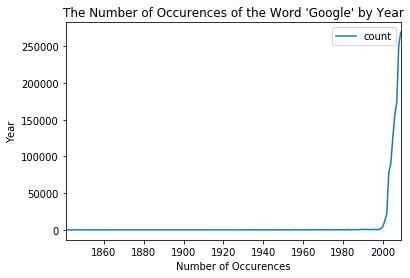

In [55]:
import matplotlib
ax=result.reset_index().plot.line(x='year', y='count', title="The Number of Occurences of the Word 'Google' by Year")
ax.set_ylabel('Year')
ax.set_xlabel('Number of Occurences')


### Plot the number of occurences of the word `google` by year for the last 10 years (2000-2009):

This gives a better visual of the tail increase

Text(0.5, 0, 'Number of Occurences')

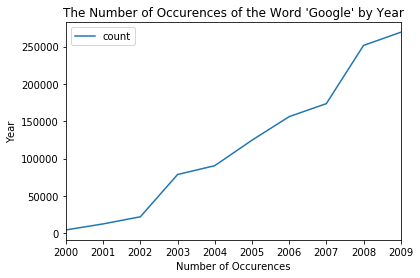

In [64]:
result2=result.tail(10)
ax=result2.reset_index().plot.line(x='year', y='count', title="The Number of Occurences of the Word 'Google' by Year")
ax.set_ylabel('Year')
ax.set_xlabel('Number of Occurences')